In [2]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs

In [2]:
eamz_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/eamz_tracks_cpm.hdf', 'table')
wamz_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/wamz_tracks_cpm.hdf', 'table')
neb_tracks_cpm =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/neb_tracks_cpm.hdf', 'table')
seb_tracks_cpm =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/seb_tracks_cpm.hdf', 'table')
lpb_tracks_cpm =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/lpb_tracks_cpm.hdf', 'table')

In [3]:
eamz_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/eamz_tracks_pd.hdf', 'table')
wamz_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/wamz_tracks_pd.hdf', 'table')
neb_tracks_pd =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/neb_tracks_pd.hdf', 'table')
seb_tracks_pd =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/seb_tracks_pd.hdf', 'table')
lpb_tracks_pd =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/lpb_tracks_pd.hdf', 'table')

In [4]:
eamz_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/eamz_tracks_obs.hdf', 'table')
wamz_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/wamz_tracks_obs.hdf', 'table')
neb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/neb_tracks_obs.hdf', 'table')
seb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/seb_tracks_obs.hdf', 'table')
lpb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/lpb_tracks_obs.hdf', 'table')

In [2]:
all_years_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/all_years_combined_CCPF/all_years_CCPF_cpm_hindcast.hdf', 'table')
all_years_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/all_years_combined_CCPF/all_years_CCPF_obs.hdf', 'table')
all_years_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/all_years_combined_CCPF/all_years_CCPF.hdf', 'table')

In [13]:
## load dataframes for init and diss locations
all_years_cpm_init_diss = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/all_years_combined_CCPF/all_years_CCPF_cpm_hindcast_INIT_DISS_LOCATIONS.hdf', 'table')
all_years_obs_init_diss = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/all_years_combined_CCPF/all_years_CCPF_obs_INIT_DISS_LOCATIONS.hdf', 'table')
all_years_pd_init_diss = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/all_years_combined_CCPF/all_years_CCPF_INIT_DISS_LOCATIONS.hdf', 'table')

In [16]:
## making sure cpm simulations start from 2001 rather than 1998

# import cftime

# time_reference = cftime.Datetime360Day(year=2001, month=1, day=1, hour=0) 
# time_reference

# all_years_pd = all_years_pd[all_years_pd.time >= time_reference].sort_values(by='timestr', ascending=True) ## for PD simulation
# all_years_cpm = all_years_cpm[all_years_cpm.timestr.dt.year > 2000].sort_values(by='timestr', ascending=True) ## for hindcast simulation

In [17]:
# ## only need to run this cell for all_years_cpm ##

# # Need to remane the columns to latitude and longitude (and -360 from the longitude) for velocity function and plotting to work 
# all_years_cpm.rename(columns={'projection_x_coordinate': 'longitude', 'projection_y_coordinate': 'latitude'}, inplace=True)
# #all_years_CCPF.rename(columns={'projection_x_coordinate': 'longitude', 'projection_y_coordinate': 'latitude'}, inplace=True)

# all_years_cpm.longitude = all_years_cpm.longitude - 360
# #all_years_CCPF.longitude = all_years_CCPF.longitude - 360

In [6]:
## subsetting all_years_x datasets into seasons to plot separately later ##

all_years_cpm_djf = all_years_cpm[(all_years_cpm.datetime.dt.month <= 2) | (all_years_cpm.datetime.dt.month == 12)]
all_years_cpm_mam = all_years_cpm[(all_years_cpm.datetime.dt.month > 2) & (all_years_cpm.datetime.dt.month <= 5)]
all_years_cpm_jja = all_years_cpm[(all_years_cpm.datetime.dt.month > 5) & (all_years_cpm.datetime.dt.month <= 8)]
all_years_cpm_son = all_years_cpm[(all_years_cpm.datetime.dt.month > 8) & (all_years_cpm.datetime.dt.month <= 11)]

all_years_obs_djf = all_years_obs[(all_years_obs.datetime.dt.month <= 2) | (all_years_obs.datetime.dt.month == 12)]
all_years_obs_mam = all_years_obs[(all_years_obs.datetime.dt.month > 2) & (all_years_obs.datetime.dt.month <= 5)]
all_years_obs_jja = all_years_obs[(all_years_obs.datetime.dt.month > 5) & (all_years_obs.datetime.dt.month <= 8)]
all_years_obs_son = all_years_obs[(all_years_obs.datetime.dt.month > 8) & (all_years_obs.datetime.dt.month <= 11)]

In [7]:
## have to use this function to subset by season for the PD simulation due to weird 360-day calendar ##

def get_seasonal_cycle_PD(tracks):
    tracks['month'] = np.zeros(tracks.shape[0])
    for i in np.arange(0, tracks.shape[0]):
        tracks['month'].iloc[i] = int(cftime.datetime.strftime(tracks.time.iloc[i]).replace(":", "-").replace(" ", "-").split("-")[1]) ## this isolates the hour from the timestr

    return tracks

all_years_pd = get_seasonal_cycle_PD(all_years_pd)

all_years_pd_djf = all_years_pd[(all_years_pd.month <= 2) | (all_years_pd.month == 12)]
all_years_pd_mam = all_years_pd[(all_years_pd.month > 2) & (all_years_pd.month <= 5)]
all_years_pd_jja = all_years_pd[(all_years_pd.month > 5) & (all_years_pd.month <= 8)]
all_years_pd_son = all_years_pd[(all_years_pd.month > 8) & (all_years_pd.month <= 11)]

In [10]:
## find x and y coordinates for each timestep of MCS lifetime for each simulation + season ##

x_f_djf = all_years_cpm_djf.longitude
y_f_djf = all_years_cpm_djf.latitude

x_f_mam = all_years_cpm_mam.longitude
y_f_mam = all_years_cpm_mam.latitude

x_f_jja = all_years_cpm_jja.longitude
y_f_jja = all_years_cpm_jja.latitude

x_f_son = all_years_cpm_son.longitude
y_f_son = all_years_cpm_son.latitude

x_pd_djf = all_years_pd_djf.longitude
y_pd_djf = all_years_pd_djf.latitude

x_pd_mam = all_years_pd_mam.longitude
y_pd_mam = all_years_pd_mam.latitude

x_pd_jja = all_years_pd_jja.longitude
y_pd_jja = all_years_pd_jja.latitude

x_pd_son = all_years_pd_son.longitude
y_pd_son = all_years_pd_son.latitude

x_o_djf = all_years_obs_djf.longitude
y_o_djf = all_years_obs_djf.latitude

x_o_djf = all_years_obs_djf.longitude
y_o_djf = all_years_obs_djf.latitude

x_o_mam = all_years_obs_mam.longitude
y_o_mam = all_years_obs_mam.latitude

x_o_jja = all_years_obs_jja.longitude
y_o_jja = all_years_obs_jja.latitude

x_o_son = all_years_obs_son.longitude
y_o_son = all_years_obs_son.latitude

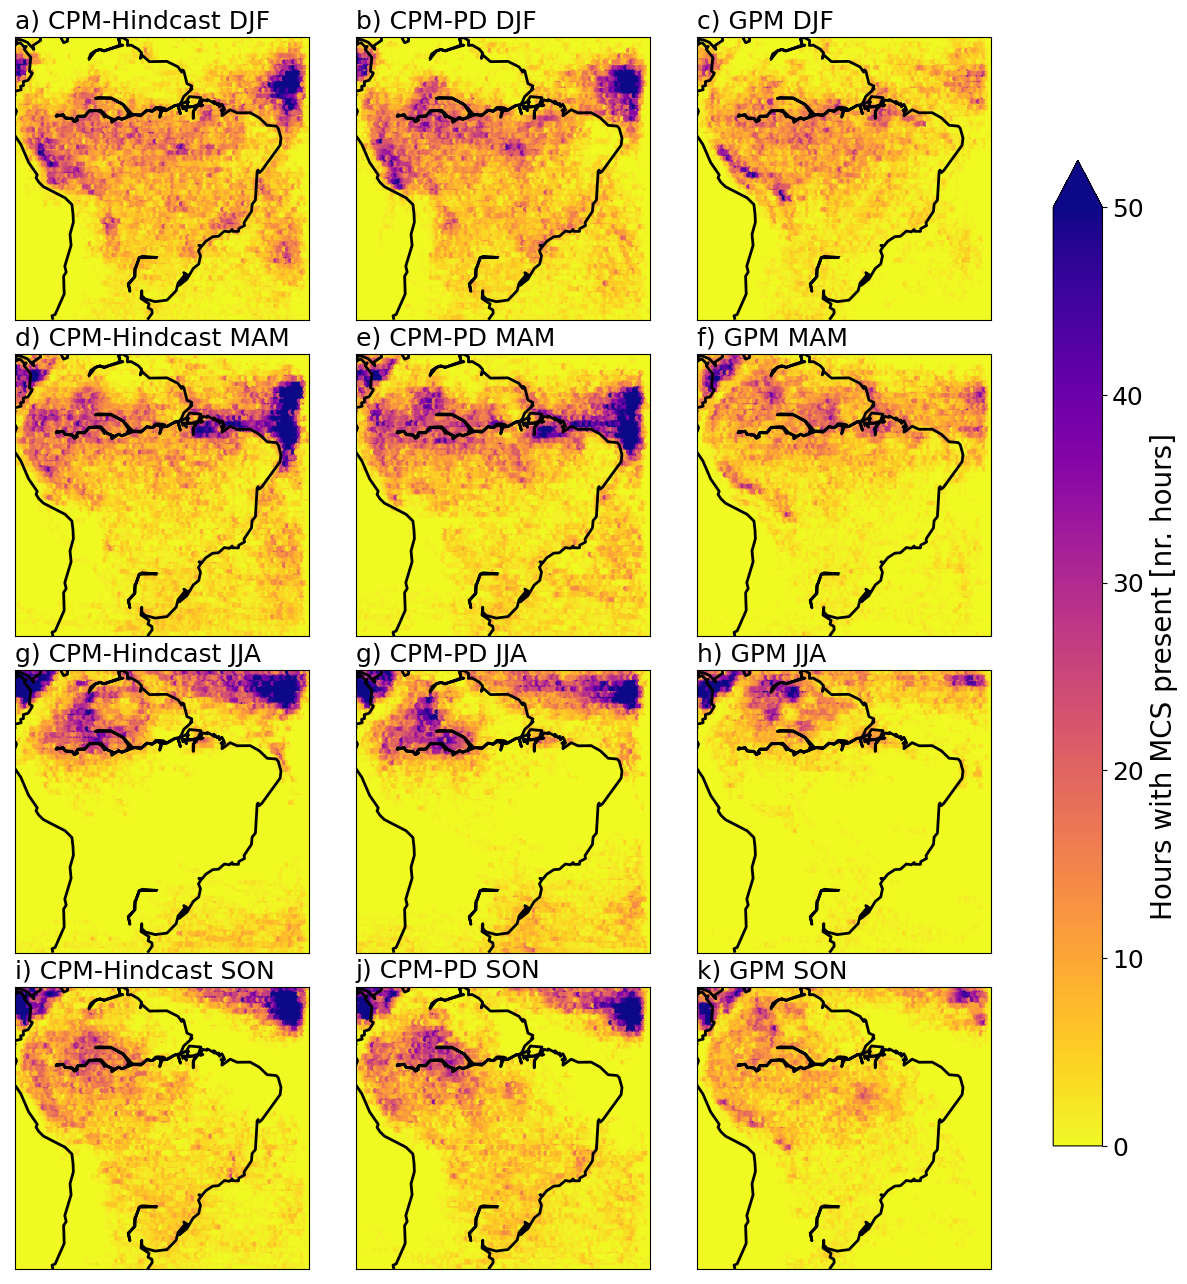

In [17]:
## plotting seasonal variations in MCS density distribution for all simulations ##

import mpl_toolkits
from mpl_toolkits.basemap import Basemap


fig = plt.figure(figsize=(16,16))

ax1=plt.subplot(4,3,1)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f_djf = m.hexbin(x_f_djf, y_f_djf, C=None,cmap='plasma_r',vmin=0,vmax=50, extent=(-80, -30, -40, 15))
ax1.set_title('a) CPM-Hindcast DJF', loc='left',fontsize=18)


ax2=plt.subplot(4,3,2)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd_djf = m.hexbin(x_pd_djf, y_pd_djf, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15))
ax2.set_title('b) CPM-PD DJF', loc='left',fontsize=18)


ax3=plt.subplot(4,3,3)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o_DJF = m.hexbin(x_o_djf, y_o_djf, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax3.set_title('c) GPM DJF', loc='left',fontsize=18)

ax4=plt.subplot(4,3,4)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f_mam = m.hexbin(x_f_mam, y_f_mam, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax4.set_title('d) CPM-Hindcast MAM', loc='left',fontsize=18)

ax5=plt.subplot(4,3,5)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd_mam = m.hexbin(x_pd_mam, y_pd_mam, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax5.set_title('e) CPM-PD MAM', loc='left',fontsize=18)

ax6=plt.subplot(4,3,6)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o_mam = m.hexbin(x_o_mam, y_o_mam, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax6.set_title('f) GPM MAM', loc='left',fontsize=18)

ax7=plt.subplot(4,3,7)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f_jja = m.hexbin(x_f_jja, y_f_jja, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax7.set_title('g) CPM-Hindcast JJA', loc='left',fontsize=18)

ax8=plt.subplot(4,3,8)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd_jja = m.hexbin(x_pd_jja, y_pd_jja, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax8.set_title('g) CPM-PD JJA', loc='left',fontsize=18)

ax9=plt.subplot(4,3,9)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o_jja = m.hexbin(x_o_jja, y_o_jja, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax9.set_title('h) GPM JJA', loc='left',fontsize=18)

ax10=plt.subplot(4,3,10)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f_son = m.hexbin(x_f_son, y_f_son, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax10.set_title('i) CPM-Hindcast SON', loc='left',fontsize=18)

ax11=plt.subplot(4,3,11)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd_son = m.hexbin(x_pd_son, y_pd_son, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax11.set_title('j) CPM-PD SON', loc='left',fontsize=18)

ax12=plt.subplot(4,3,12)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o_son = m.hexbin(x_o_son, y_o_son, C=None,cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax12.set_title('k) GPM SON', loc='left',fontsize=18)


fig.subplots_adjust(right=0.9, wspace=0.1, hspace=0.12)
cbar = fig.colorbar(hx_pd_djf, ax=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12], shrink=0.8, extend='max')

cbar.set_label(label='Hours with MCS present [nr. hours]', fontsize=20)
cbar.ax.tick_params(labelsize=18)

In [ ]:
## plotting the same as above but all year rather than seasonal ##

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

x_f = all_years_cpm.longitude
y_f = all_years_cpm.latitude

x_pd = all_years_pd.longitude
y_pd = all_years_pd.latitude

x_o = all_years_obs.longitude
y_o = all_years_obs.latitude


fig = plt.figure(figsize=(18,9))

ax1=plt.subplot(2,3,1)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f = m.hexbin(x_f, y_f, C=None,cmap='plasma_r',vmin=0,vmax=100, extent=(-80, -30, -40, 15))
ax1.set_title('a) CPM-Hindcast', loc='left',fontsize=18)


ax2=plt.subplot(2,3,2)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd = m.hexbin(x_pd, y_pd, C=None,cmap='plasma_r', vmin=0,vmax=100, extent=(-80, -30, -40, 15))
ax2.set_title('b) CPM-PD', loc='left',fontsize=18)


ax3=plt.subplot(2,3,3)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o = m.hexbin(x_o, y_o, C=None,cmap='plasma_r', vmin=0,vmax=100, extent=(-80, -30, -40, 15), edgecolors='face')
ax3.set_title('c) GPM', loc='left',fontsize=18)


ax7=plt.subplot(2,3,4)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff=m.hexbin(x_f, y_f, C=None,cmap='RdBu_r', vmin=-50,vmax=50, extent=(-80, -30, -40, 15))
hx_diff.set_array(hx_f.get_array()-hx_o.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax7.set_title('d) CPM-Hindcast - GPM', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff, ax=ax7, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-Hindcast - GPM', fontsize=16)
# cbar.ax.tick_params(labelsize=12)

ax8=plt.subplot(2,3,5)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff_2=m.hexbin(x_f, y_f, C=None,cmap='RdBu_r', vmin=-50,vmax=50, extent=(-80, -30, -40, 15))
hx_diff_2.set_array(hx_pd.get_array()-hx_o.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax8.set_title('e) CPM-PD - GPM', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff_2, ax=ax8, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-PD - GPM', fontsize=16)
# cbar.ax.tick_params(labelsize=12)

ax9=plt.subplot(2,3,6)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff_3=m.hexbin(x_f, y_f, C=None,cmap='RdBu_r', vmin=-50,vmax=50, extent=(-80, -30, -40, 15))
hx_diff_3.set_array(hx_f.get_array()-hx_pd.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax9.set_title('f) CPM-Hindcast - CPM-PD', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff_3, ax=ax9, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-Hindcast - CPM-PD', fontsize=16)
# cbar.ax.tick_params(labelsize=12)


fig.subplots_adjust(right=0.9, wspace=0.1, hspace=0.12)
cbar = fig.colorbar(hx_pd, ax=[ax1, ax2, ax3], shrink=0.8, extend='max')
cbar_2 = fig.colorbar(hx_diff_2, ax=[ax7, ax8, ax9], shrink=0.8, extend='both')

cbar.set_label(label='Hours with MCS present\n [nr. hours]', fontsize=16)
cbar.ax.tick_params(labelsize=14)

cbar_2.set_label(label='Difference \n[nr. hours]', fontsize=16)
cbar_2.ax.tick_params(labelsize=14)


In [21]:
## now subsetting the init_diss datasets into seasons ready to plot ##
all_years_cpm_init_diss_djf = all_years_cpm_init_diss[(all_years_cpm_init_diss.month <= 2) | (all_years_cpm_init_diss.month == 12) ]
all_years_cpm_init_diss_mam = all_years_cpm_init_diss[(all_years_cpm_init_diss.month > 2) & (all_years_cpm_init_diss.month <= 5)]
all_years_cpm_init_diss_jja = all_years_cpm_init_diss[(all_years_cpm_init_diss.month > 5) & (all_years_cpm_init_diss.month <= 8)]
all_years_cpm_init_diss_son = all_years_cpm_init_diss[(all_years_cpm_init_diss.month > 8) & (all_years_cpm_init_diss.month <= 11)]

all_years_obs_init_diss_djf = all_years_obs_init_diss[(all_years_obs_init_diss.month <= 2) | (all_years_obs_init_diss.month == 12)]
all_years_obs_init_diss_mam = all_years_obs_init_diss[(all_years_obs_init_diss.month > 2) & (all_years_obs_init_diss.month <= 5)]
all_years_obs_init_diss_jja = all_years_obs_init_diss[(all_years_obs_init_diss.month > 5) & (all_years_obs_init_diss.month <= 8)]
all_years_obs_init_diss_son = all_years_obs_init_diss[(all_years_obs_init_diss.month > 8) & (all_years_obs_init_diss.month <= 11)]

all_years_pd_init_diss_djf = all_years_pd_init_diss[(all_years_pd_init_diss.month <= 2) | (all_years_pd_init_diss.month == 12)]
all_years_pd_init_diss_mam = all_years_pd_init_diss[(all_years_pd_init_diss.month > 2) & (all_years_pd_init_diss.month <= 5)]
all_years_pd_init_diss_jja = all_years_pd_init_diss[(all_years_pd_init_diss.month > 5) & (all_years_pd_init_diss.month <= 8)]
all_years_pd_init_diss_son = all_years_pd_init_diss[(all_years_pd_init_diss.month > 8) & (all_years_pd_init_diss.month <= 11)]

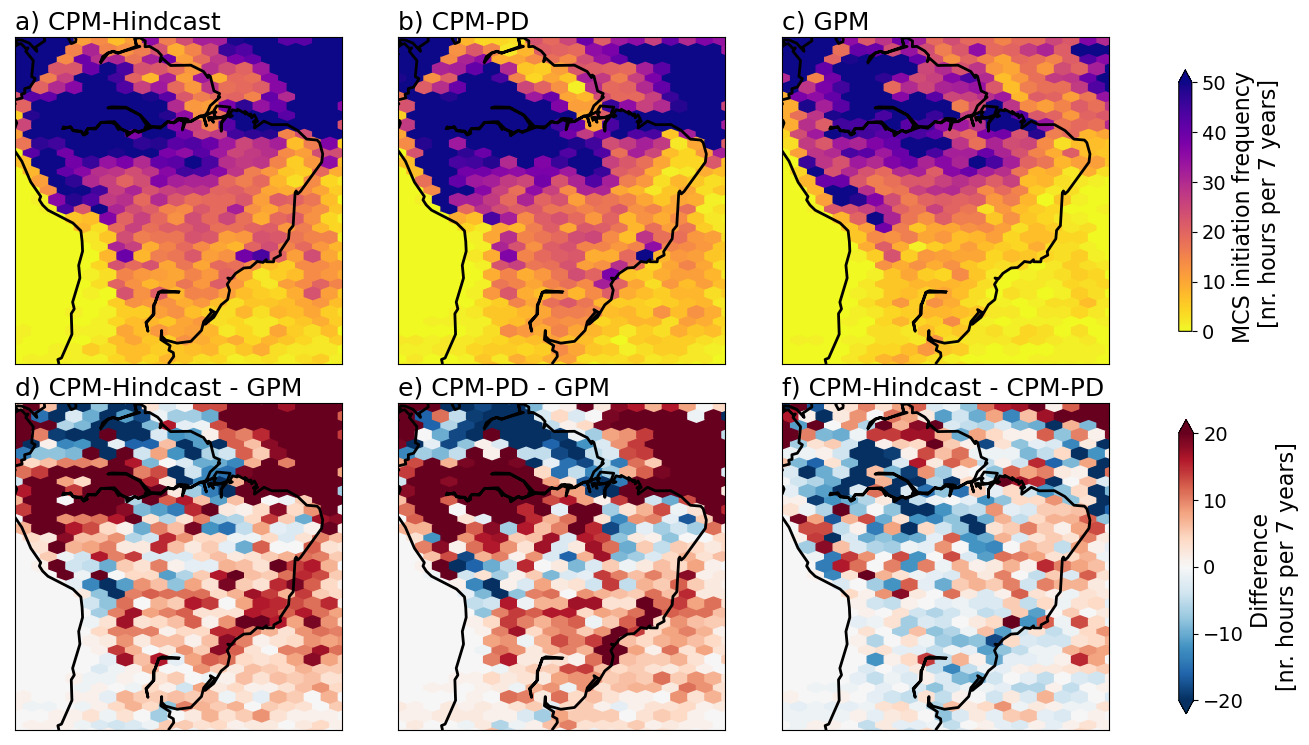

In [37]:
## density of MCS initiation for all years ##

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

x_f = all_years_cpm_init_diss.initiation_lon
y_f = all_years_cpm_init_diss.initiation_lat

x_pd = all_years_pd_init_diss.initiation_lon
y_pd = all_years_pd_init_diss.initiation_lat

x_o = all_years_obs_init_diss.initiation_lon
y_o = all_years_obs_init_diss.initiation_lat


fig = plt.figure(figsize=(18,9))

ax1=plt.subplot(2,3,1)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f = m.hexbin(x_f, y_f, gridsize=(20,20),cmap='plasma_r',vmin=0,vmax=50, extent=(-80, -30, -40, 15))
ax1.set_title('a) CPM-Hindcast', loc='left',fontsize=18)


ax2=plt.subplot(2,3,2)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd = m.hexbin(x_pd, y_pd, gridsize=(20,20),cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15))
ax2.set_title('b) CPM-PD', loc='left',fontsize=18)


ax3=plt.subplot(2,3,3)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o = m.hexbin(x_o, y_o, gridsize=(20,20),cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax3.set_title('c) GPM', loc='left',fontsize=18)


ax7=plt.subplot(2,3,4)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff=m.hexbin(x_f, y_f, gridsize=(20,20),cmap='RdBu_r', vmin=-20,vmax=20, extent=(-80, -30, -40, 15))
hx_diff.set_array(hx_f.get_array()-hx_o.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax7.set_title('d) CPM-Hindcast - GPM', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff, ax=ax7, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-Hindcast - GPM', fontsize=16)
# cbar.ax.tick_params(labelsize=12)

ax8=plt.subplot(2,3,5)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff_2=m.hexbin(x_f, y_f, gridsize=(20,20),cmap='RdBu_r', vmin=-20,vmax=20, extent=(-80, -30, -40, 15))
hx_diff_2.set_array(hx_pd.get_array()-hx_o.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax8.set_title('e) CPM-PD - GPM', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff_2, ax=ax8, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-PD - GPM', fontsize=16)
# cbar.ax.tick_params(labelsize=12)

ax9=plt.subplot(2,3,6)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff_3=m.hexbin(x_f, y_f, gridsize=(20,20),cmap='RdBu_r', vmin=-20,vmax=20, extent=(-80, -30, -40, 15))
hx_diff_3.set_array(hx_f.get_array()-hx_pd.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax9.set_title('f) CPM-Hindcast - CPM-PD', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff_3, ax=ax9, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-Hindcast - CPM-PD', fontsize=16)
# cbar.ax.tick_params(labelsize=12)


fig.subplots_adjust(right=0.9, wspace=0.1, hspace=0.12)
cbar = fig.colorbar(hx_pd, ax=[ax1, ax2, ax3], shrink=0.8, extend='max')
cbar_2 = fig.colorbar(hx_diff_2, ax=[ax7, ax8, ax9], shrink=0.9, extend='both')

cbar.set_label(label='MCS initiation frequency\n [nr. hours per 7 years]', fontsize=16)
cbar.ax.tick_params(labelsize=14)

cbar_2.set_label(label='Difference \n[nr. hours per 7 years]', fontsize=16)
cbar_2.ax.tick_params(labelsize=14)

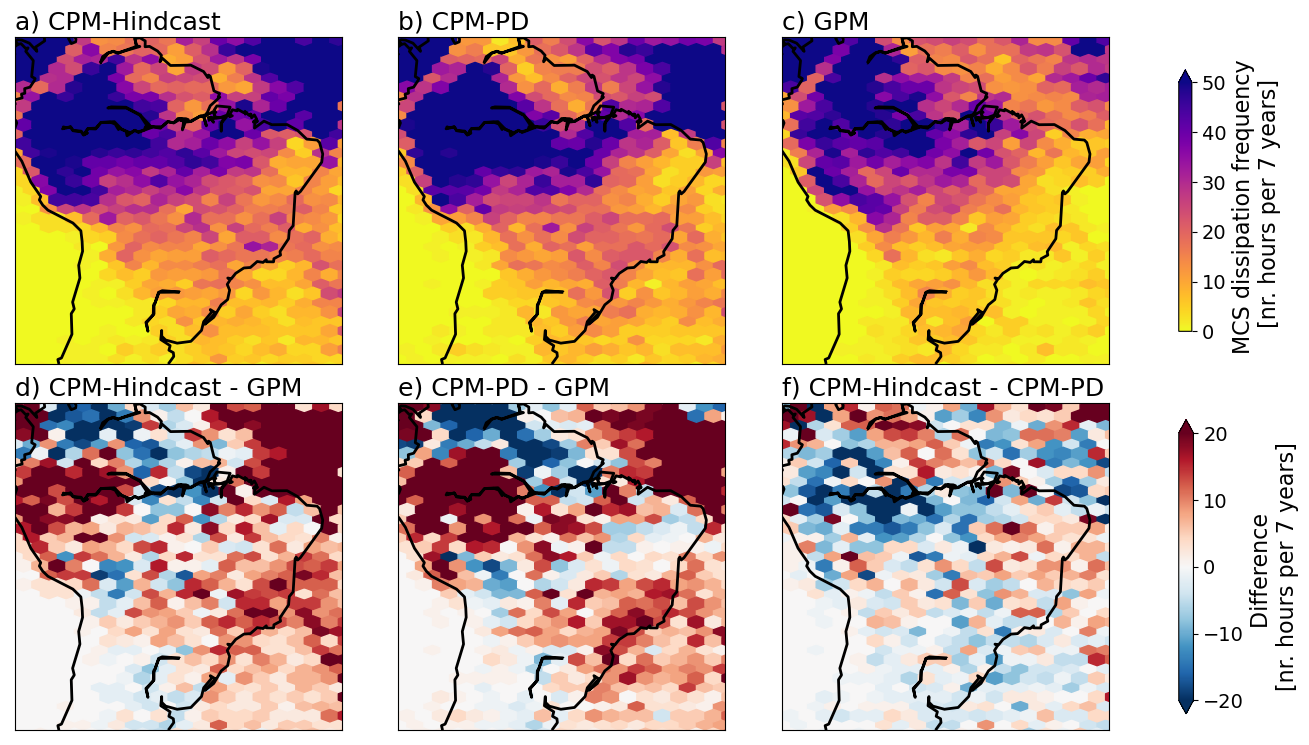

In [38]:
## density of MCS initiation

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

x_f = all_years_cpm_init_diss.dissipation_lon
y_f = all_years_cpm_init_diss.dissipation_lat

x_pd = all_years_pd_init_diss.dissipation_lon
y_pd = all_years_pd_init_diss.dissipation_lat

x_o = all_years_obs_init_diss.dissipation_lon
y_o = all_years_obs_init_diss.dissipation_lat


fig = plt.figure(figsize=(18,9))

ax1=plt.subplot(2,3,1)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f = m.hexbin(x_f, y_f, gridsize=(20,20),cmap='plasma_r',vmin=0,vmax=50, extent=(-80, -30, -40, 15))
ax1.set_title('a) CPM-Hindcast', loc='left',fontsize=18)


ax2=plt.subplot(2,3,2)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd = m.hexbin(x_pd, y_pd, gridsize=(20,20),cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15))
ax2.set_title('b) CPM-PD', loc='left',fontsize=18)


ax3=plt.subplot(2,3,3)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o = m.hexbin(x_o, y_o, gridsize=(20,20),cmap='plasma_r', vmin=0,vmax=50, extent=(-80, -30, -40, 15), edgecolors='face')
ax3.set_title('c) GPM', loc='left',fontsize=18)


ax7=plt.subplot(2,3,4)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff=m.hexbin(x_f, y_f, gridsize=(20,20),cmap='RdBu_r', vmin=-20,vmax=20, extent=(-80, -30, -40, 15))
hx_diff.set_array(hx_f.get_array()-hx_o.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax7.set_title('d) CPM-Hindcast - GPM', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff, ax=ax7, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-Hindcast - GPM', fontsize=16)
# cbar.ax.tick_params(labelsize=12)

ax8=plt.subplot(2,3,5)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff_2=m.hexbin(x_f, y_f, gridsize=(20,20),cmap='RdBu_r', vmin=-20,vmax=20, extent=(-80, -30, -40, 15))
hx_diff_2.set_array(hx_pd.get_array()-hx_o.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax8.set_title('e) CPM-PD - GPM', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff_2, ax=ax8, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-PD - GPM', fontsize=16)
# cbar.ax.tick_params(labelsize=12)

ax9=plt.subplot(2,3,6)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-32, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_diff_3=m.hexbin(x_f, y_f, gridsize=(20,20),cmap='RdBu_r', vmin=-20,vmax=20, extent=(-80, -30, -40, 15))
hx_diff_3.set_array(hx_f.get_array()-hx_pd.get_array()) ## 61320 hours between 01/01/2001 and 31/12/2007. *100 to go from ratio to %
ax9.set_title('f) CPM-Hindcast - CPM-PD', loc='left',fontsize=18)
# cbar = plt.colorbar(hx_diff_3, ax=ax9, shrink=0.8, extend='both')
# cbar.set_label(label='CPM-Hindcast - CPM-PD', fontsize=16)
# cbar.ax.tick_params(labelsize=12)


fig.subplots_adjust(right=0.9, wspace=0.1, hspace=0.12)
cbar = fig.colorbar(hx_pd, ax=[ax1, ax2, ax3], shrink=0.8, extend='max')
cbar_2 = fig.colorbar(hx_diff_2, ax=[ax7, ax8, ax9], shrink=0.9, extend='both')

cbar.set_label(label='MCS dissipation frequency\n [nr. hours per 7 years]', fontsize=16)
cbar.ax.tick_params(labelsize=14)

cbar_2.set_label(label='Difference \n[nr. hours per 7 years]', fontsize=16)
cbar_2.ax.tick_params(labelsize=14)

In [22]:
all_years_cpm_init_diss_djf

cell  initiation_lat  initiation_lon  dissipation_lat  \
0          20018       -1.804295      -70.603751        -4.475556   
1          20026       -9.412115      -34.852409       -10.046687   
2          20036      -21.031538      -58.802300       -20.676294   
3          20043      -19.017418      -48.989982       -19.100932   
4          20044      -21.787143      -59.571438       -19.206719   
...          ...             ...             ...              ...   
21055  200723230       -5.652812      -51.828706        -5.083835   
21056  200723233      -15.220970      -67.347313       -10.462610   
21057  200723235       -6.609466      -60.702839        -6.234066   
21058  200723245       -7.828477      -42.875584        -7.101434   
21059  200723246       -2.676328      -41.739763        -1.791294   

       dissipation_lon  year  month  
0           -72.528933  2001      1  
1           -33.459050  2002      1  
2           -61.562745  2003      1  
3           -51.160756  2004      1  
4           -59.782940  2004      1  
...                ...   ...    ...  
21055       -56.038124  2007     12  
21056       -68.260755  2007     12  
21057       -60.633530  2007     12  
21058       -45.628160  2007     12  
21059       -37.684588  2007     12  

[5287 rows x 7 columns]

In [23]:
## find x and y coordinates for each timestep of MCS lifetime for each simulation + season ##

### initiation ###
x_f_init_djf = all_years_cpm_init_diss_djf.initiation_lon
y_f_init_djf = all_years_cpm_init_diss_djf.initiation_lat

x_f_init_mam = all_years_cpm_init_diss_mam.initiation_lon
y_f_init_mam = all_years_cpm_init_diss_mam.initiation_lat

x_f_init_jja = all_years_cpm_init_diss_jja.initiation_lon
y_f_init_jja = all_years_cpm_init_diss_jja.initiation_lat

x_f_init_son = all_years_cpm_init_diss_son.initiation_lon
y_f_init_son = all_years_cpm_init_diss_son.initiation_lat

x_pd_init_djf = all_years_pd_init_diss_djf.initiation_lon
y_pd_init_djf = all_years_pd_init_diss_djf.initiation_lat

x_pd_init_mam = all_years_pd_init_diss_mam.initiation_lon
y_pd_init_mam = all_years_pd_init_diss_mam.initiation_lat

x_pd_init_jja = all_years_pd_init_diss_jja.initiation_lon
y_pd_init_jja = all_years_pd_init_diss_jja.initiation_lat

x_pd_init_son = all_years_pd_init_diss_son.initiation_lon
y_pd_init_son = all_years_pd_init_diss_son.initiation_lat

x_o_init_djf = all_years_obs_init_diss_djf.initiation_lon
y_o_init_djf = all_years_obs_init_diss_djf.initiation_lat

x_o_init_djf = all_years_obs_init_diss_djf.initiation_lon
y_o_init_djf = all_years_obs_init_diss_djf.initiation_lat

x_o_init_mam = all_years_obs_init_diss_mam.initiation_lon
y_o_init_mam = all_years_obs_init_diss_mam.initiation_lat

x_o_init_jja = all_years_obs_init_diss_jja.initiation_lon
y_o_init_jja = all_years_obs_init_diss_jja.initiation_lat

x_o_init_son = all_years_obs_init_diss_son.initiation_lon
y_o_init_son = all_years_obs_init_diss_son.initiation_lat

### dissipation ###
x_f_diss_djf = all_years_cpm_init_diss_djf.dissipation_lon
y_f_diss_djf = all_years_cpm_init_diss_djf.dissipation_lat

x_f_diss_mam = all_years_cpm_init_diss_mam.dissipation_lon
y_f_diss_mam = all_years_cpm_init_diss_mam.dissipation_lat

x_f_diss_jja = all_years_cpm_init_diss_jja.dissipation_lon
y_f_diss_jja = all_years_cpm_init_diss_jja.dissipation_lat

x_f_diss_son = all_years_cpm_init_diss_son.dissipation_lon
y_f_diss_son = all_years_cpm_init_diss_son.dissipation_lat

x_pd_diss_djf = all_years_pd_init_diss_djf.dissipation_lon
y_pd_diss_djf = all_years_pd_init_diss_djf.dissipation_lat

x_pd_diss_mam = all_years_pd_init_diss_mam.dissipation_lon
y_pd_diss_mam = all_years_pd_init_diss_mam.dissipation_lat

x_pd_diss_jja = all_years_pd_init_diss_jja.dissipation_lon
y_pd_diss_jja = all_years_pd_init_diss_jja.dissipation_lat

x_pd_diss_son = all_years_pd_init_diss_son.dissipation_lon
y_pd_diss_son = all_years_pd_init_diss_son.dissipation_lat

x_o_diss_djf = all_years_obs_init_diss_djf.dissipation_lon
y_o_diss_djf = all_years_obs_init_diss_djf.dissipation_lat

x_o_diss_djf = all_years_obs_init_diss_djf.dissipation_lon
y_o_diss_djf = all_years_obs_init_diss_djf.dissipation_lat

x_o_diss_mam = all_years_obs_init_diss_mam.dissipation_lon
y_o_diss_mam = all_years_obs_init_diss_mam.dissipation_lat

x_o_diss_jja = all_years_obs_init_diss_jja.dissipation_lon
y_o_diss_jja = all_years_obs_init_diss_jja.dissipation_lat

x_o_diss_son = all_years_obs_init_diss_son.dissipation_lon
y_o_diss_son = all_years_obs_init_diss_son.dissipation_lat

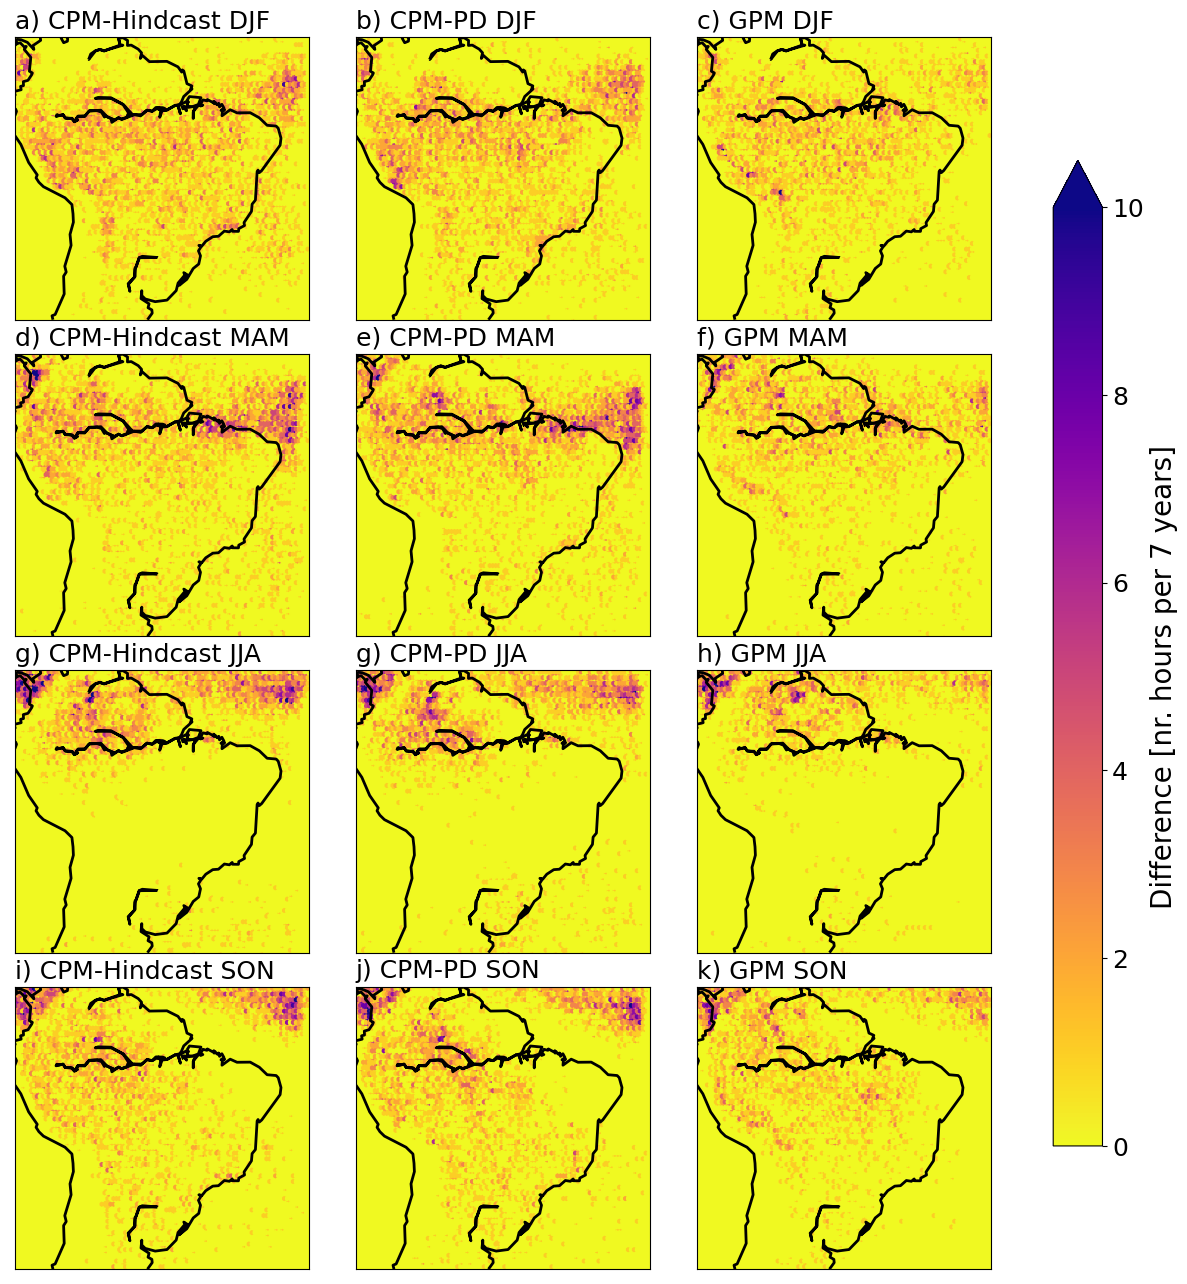

In [26]:
## plotting seasonal variations in MCS INITIATION density distribution for all simulations ##

import mpl_toolkits
from mpl_toolkits.basemap import Basemap


fig = plt.figure(figsize=(16,16))

ax1=plt.subplot(4,3,1)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f_init_djf = m.hexbin(x_f_init_djf, y_f_init_djf, C=None,cmap='plasma_r',vmin=0,vmax=10, extent=(-80, -30, -40, 15))
ax1.set_title('a) CPM-Hindcast DJF', loc='left',fontsize=18)


ax2=plt.subplot(4,3,2)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd_init_djf = m.hexbin(x_pd_init_djf, y_pd_init_djf, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15))
ax2.set_title('b) CPM-PD DJF', loc='left',fontsize=18)


ax3=plt.subplot(4,3,3)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o_init_djf = m.hexbin(x_o_init_djf, y_o_init_djf, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax3.set_title('c) GPM DJF', loc='left',fontsize=18)

ax4=plt.subplot(4,3,4)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f_init_mam = m.hexbin(x_f_init_mam, y_f_init_mam, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax4.set_title('d) CPM-Hindcast MAM', loc='left',fontsize=18)

ax5=plt.subplot(4,3,5)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd_init_mam = m.hexbin(x_pd_init_mam, y_pd_init_mam, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax5.set_title('e) CPM-PD MAM', loc='left',fontsize=18)

ax6=plt.subplot(4,3,6)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o_init_mam = m.hexbin(x_o_init_mam, y_o_init_mam, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax6.set_title('f) GPM MAM', loc='left',fontsize=18)

ax7=plt.subplot(4,3,7)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f_init_jja = m.hexbin(x_f_init_jja, y_f_init_jja, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax7.set_title('g) CPM-Hindcast JJA', loc='left',fontsize=18)

ax8=plt.subplot(4,3,8)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd_init_jja = m.hexbin(x_pd_init_jja, y_pd_init_jja, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax8.set_title('g) CPM-PD JJA', loc='left',fontsize=18)

ax9=plt.subplot(4,3,9)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o_init_jja = m.hexbin(x_o_init_jja, y_o_init_jja, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax9.set_title('h) GPM JJA', loc='left',fontsize=18)

ax10=plt.subplot(4,3,10)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_f_init_son = m.hexbin(x_f_init_son, y_f_init_son, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax10.set_title('i) CPM-Hindcast SON', loc='left',fontsize=18)

ax11=plt.subplot(4,3,11)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_pd_init_son = m.hexbin(x_pd_init_son, y_pd_init_son, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax11.set_title('j) CPM-PD SON', loc='left',fontsize=18)

ax12=plt.subplot(4,3,12)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2) # draw coastlines
hx_o_init_son = m.hexbin(x_o_init_son, y_o_init_son, C=None,cmap='plasma_r', vmin=0,vmax=10, extent=(-80, -30, -40, 15), edgecolors='face')
ax12.set_title('k) GPM SON', loc='left',fontsize=18)


fig.subplots_adjust(right=0.9, wspace=0.1, hspace=0.12)
cbar = fig.colorbar(hx_pd_init_djf, ax=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12], shrink=0.8, extend='max')

cbar.set_label(label='Difference [nr. hours per 7 years]', fontsize=20)
cbar.ax.tick_params(labelsize=18)